# Lesson 2: Array-oriented programming

## Programming paradigms

<br>

Programming paradigms, such as "imperative," "object-oriented," and "functional," are general styles of programming.

<br><br>

Some programming languages were designed to enable or encourage some paradigms over others. For example, C++ enabled object-oriented programming in C.

<br><br>

In array-oriented programming, the primary data type is an array, and most functions perform one operation on all the elements of the array.

<br><br>

In [3]:
import numpy as np

This is _imperative_ programming:

<br>

In [4]:
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
output_data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])

for i in range(len(input_data)):             # explicitly specifies an order of execution
    output_data[i] = input_data[i]**2        # user says what happens to each element

output_data

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

This is _functional_ programming:

<br>

In [5]:
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

output_data = np.fromiter(
    map(lambda x: x**2, input_data), int     # still focused on the individual element "x"
)

output_data

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

And this is _array-oriented_ programming:

<br>

In [6]:
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

output_data = input_data**2                  # implicit indexes, no individual elements

output_data

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

Programming paradigms are not sharply defined. A single language and even a single codebase can use several paradigms.

<br>

They are _styles_, and they're useful because they each bring different programming concepts into the foreground:

| Paradigm | Emphasizes |
|:-:|:-:|
| imperative/procedural | low-level algorithms |
| object-oriented | large-scale program structure |
| actor-based | temporal locality |
| literate | human instruction |
| event-driven | cause-and-effect |
| declarative | properties of desired result |
| symbolic | formula transformations |
| functional | data transformations |
| array-oriented | data distributions |

## What is array-oriented programming good for?

<br>

All of the languages/major libraries that emphasize array-oriented programming (that I know of):

<br>

<img src="../img/apl-timeline.svg" width="100%">

Almost all of them are intended as _interactive data-analysis_ environments.

(Fortran-90 is the only one that is not interactive.)

<br><br>

Almost all feature:

* interactive REPL (read-evaluate-print loop)
* concise notation
* unabashedly mathematical

### The grandfather: APL

<table><tr>
    <td width="25%"><img src="../img/apl-book.png" width="100%"></td>
    <td width="50%"><img src="../img/apl-keyboard.jpg" width="100%"></td>
</tr></table>

In [7]:
%%html
<div style="overflow: hidden;"><iframe src="https://tryapl.org/" width="100%" height="380" scrolling="no" style="border: none;"></div>

**Quizlet:** Translate the following NumPy operations into APL.

<br>

In [8]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<br>

In [9]:
np.sum(np.arange(10))

np.int64(45)

<br>

In [10]:
np.cumsum(np.arange(10))

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

**Answers:**

```apl
      (⍳10) - 1
0 1 2 3 4 5 6 7 8 9

      +/(⍳10) - 1
45

      +\(⍳10) - 1
0 1 3 6 10 15 21 28 36 45
```

<br>

APL was too concise! Modern array-oriented programming is looking for the right balance.

<center>
<img src="../img/tshirt.jpg" width="20%">
</center>

### Distributions and interactivity

Array-oriented languages bring data _distributions_ to the foreground.

<br>

In [11]:
from hist import Hist  # histogram library

<br>

Given a large dataset...

In [12]:
dataset = np.random.normal(0, 1, 1000000)  # one MILLION data points

<br>

How are the data _distributed_?

In [13]:
Hist.new.Reg(100, -5, 5).Double().fill(dataset)

Hist(Regular(100, -5, 5, label='Axis 0'), storage=Double()) # Sum: 1000000.0

What happens if we apply a function to _all values in the distribution_?

In [14]:
dataset2 = dataset**2

<br>

In [15]:
Hist.new.Reg(100, -1, 10).Double().fill(dataset2)

Hist(Regular(100, -1, 10, label='Axis 0'), storage=Double()) # Sum: 998408.0 (1000000.0 with flow)

Can anyone guess what this distribution will look like?

In [16]:
dataset3 = np.sin(1/dataset2)

<br>

(I can't.)

In [17]:
Hist.new.Reg(100, -1, 1).Double().fill(dataset3)

Hist(Regular(100, -1, 1, label='Axis 0'), storage=Double()) # Sum: 1000000.0

**Human readability advantage:**

  * Mathematical expressions are concise, more convenient to type interactivity.

<br>

**Computational advantage:**

  * The right _part_ of the computation is accelerated: the loop over all values in the distribution.

## NumPy

<center>
<img src="../img/Numpy_Python_Cheat_Sheet.svg" width="90%">
</center>

NumPy's version of

```apl
      10 20 30 + 1 2 3
11 22 33
```

is

In [18]:
np.array([10, 20, 30]) + np.array([1, 2, 3])

array([11, 22, 33])

<br><br>

Since all scalar → scalar operators (and scalar → scalar functions in `np.*`) are promoted to elementwise operations on arrays, any [closed form](https://en.wikipedia.org/wiki/Closed-form_expression) expression duck-types between scalars and arrays.

In [19]:
def quadratic_formula(a, b, c):
    return (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)

Compute the quadratic formula on one set of scalar values:

In [20]:
a = 5
b = 10
c = -0.1

quadratic_formula(a, b, c)

np.float64(0.009950493836207741)

<br>

Compute the quadratic formula on a million values in arrays:

In [21]:
a = np.random.uniform(5, 10, 1000000)
b = np.random.uniform(10, 20, 1000000)
c = np.random.uniform(-0.1, 0.1, 1000000)

quadratic_formula(a, b, c)

array([ 0.00103557, -0.00499803, -0.00442489, ...,  0.00658105,
       -0.00569091, -0.00247795], shape=(1000000,))

### Speed and memory use

<br>

Although I'll later show you some techniques that are faster than NumPy, NumPy is already a huge step beyond pure Python.

In [22]:
%%timeit

output = []
for a_i, b_i, c_i in zip(a, b, c):
    output.append(quadratic_formula(a_i, b_i, c_i))

1.24 s ± 6.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<br>

In [23]:
%%timeit

output = quadratic_formula(a, b, c)

10.8 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<br>

Why?

There are essentially two kinds of languages, and Python is one of the slow ones.

<br>

<center>
<img src="../img/benchmark-games-2023.svg" width="70%">
</center>

Python (and Ruby, Perl, Lua, PHP...) allow all data types to be dynamic, so that a list or a dict can contain any type of data.

<br><br>

But this means that before each operation, data types need to be checked to see if the operation is possible.

<br><br>

Over and over again, for every step of a loop over a million elements.

Memory layout of a Python list.

<br>

<center>
<img src="../img/python-list-layout.svg" width="75%">
</center>

Memory layout of a NumPy array.

<br>

<center>
<img src="../img/python-array-layout.svg" width="75%">
</center>

Dynamic types are usually the main reason why pure Python is slow, but there are others (garbage collector, virtual machine, pointer chasing...).

<br><br><br>

Most of these are addressed by a compiled library like NumPy, in which the loops over large datasets are in compiled code.

### Expressibility in NumPy

Loops over large datasets are in compiled code, but can we still express what we need to compute from the Python side?

<br>

Usually. NumPy has most of the pieces that we need:

  * elementwise operations ("ufuncs")
  * broadcasting
  * basic and advanced slicing
  * slice-assignment
  * reshaping
  * reducers
  * specialized functions

**Example:** Compute the size of the spaces between consecutive elements.

In [24]:
array = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])
array

array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

<br><br><br>

In [25]:
array[1:] - array[:-1]

array([1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1])

<center>
<img src="../img/flat-operation.svg" width="70%">
</center>

<center>
<img src="../img/shifted-operation.svg" width="70%">
</center>

**Quizlet:** Compute the length of the curve sampled by arrays `x` and `y`.

In [26]:
t = np.linspace(0, 2*np.pi, 10000)
x = np.sin(3*t)
y = np.sin(4*t)

<br>

<center>
<img src="../img/length-by-segment.svg" width="55%">
</center>

<br>

In [27]:
import matplotlib.pyplot as plt

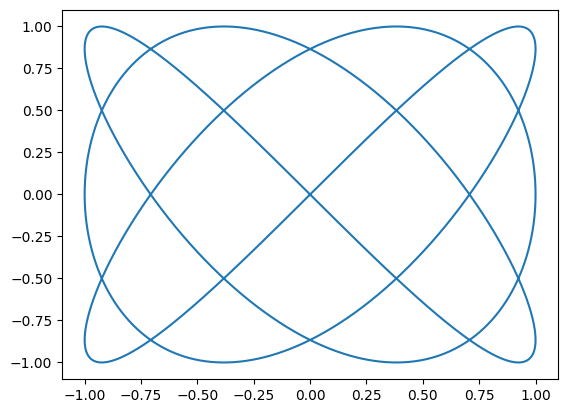

In [28]:
plt.plot(x, y);

**Answer:**

In [29]:
np.sum(np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2))

np.float64(21.237210568991465)

### Slicing

Python has a very concise slicing syntax:

```python
container[start:stop:step]
```

any one of which can be left out, to get a default. Negative values count backward, from the end.

In [30]:
container = [0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]

In [31]:
container[2:]

[2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]

<br>

In [32]:
container[:5]

[0.0, 1.1, 2.2, 3.3, 4.4]

<br>

In [33]:
container[-6:-2]

[4.4, 5.5, 6.6, 7.7]

<br>

In [34]:
container[4:10:2]

[4.4, 6.6, 8.8]

<br>

In [35]:
container[::3]

[0.0, 3.3, 6.6, 9.9]

NumPy goes beyond ordinary slicing by allowing slices in multiple dimensions.

<center>
<img src="../img/numpy-slicing.png" width="25%">
</center>

In [36]:
arr = np.array([[1.1, 2.2, 3.3],
                [4.4, 5.5, 6.6],
                [7.7, 8.8, 9.9]])
arr

array([[1.1, 2.2, 3.3],
       [4.4, 5.5, 6.6],
       [7.7, 8.8, 9.9]])

In [37]:
arr[:2, 1:]

array([[2.2, 3.3],
       [5.5, 6.6]])

<br>

In [38]:
arr[2:, :]

array([[7.7, 8.8, 9.9]])

<br>

In [39]:
arr[:, :2]

array([[1.1, 2.2],
       [4.4, 5.5],
       [7.7, 8.8]])

<br>

In [40]:
arr[1:2, :2]

array([[4.4, 5.5]])

<center>
<img src="../img/numpy-memory-layout.png" width="75%">
</center>

<center>
<img src="../img/numpy-memory-reshape.png" width="75%">
</center>

<center>
<img src="../img/numpy-memory-slice.png" width="75%">
</center>

**Quizlet:** Slice `three_dimensional` such that it looks like

```python
[[ 4  9]
 [24 29]]
```

In [41]:
three_dimensional = np.arange(30).reshape((3, 2, 5))
three_dimensional

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

<br>

In [42]:
three_dimensional[ : : ]

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

### Advanced slicing

Not only that, but NumPy can slice arrays with arrays.

In [43]:
arr  = np.array([  0.0,   1.1,   2.2,   3.3,   4.4,  5.5,   6.6,  7.7,   8.8,  9.9])
mask = np.array([False, False, False, False, False, True, False, True, False, True])
#                                                    5.5          7.7          9.9

<br>

In [44]:
arr[mask]

array([5.5, 7.7, 9.9])

<br>

An array of integers picks out elements by index.

In [45]:
arr[np.array([5, 7, -1])]

array([5.5, 7.7, 9.9])

<br>

They can be out of order.

In [46]:
arr[np.array([-1, 7, 5])]

array([9.9, 7.7, 5.5])

<br>

They can even include duplicates.

In [47]:
arr[np.array([-1, -1, -1, 7, 7, 5])]

array([9.9, 9.9, 9.9, 7.7, 7.7, 5.5])

In [48]:
text = """
WOULD YOU LIKE GREEN EGGS AND HAM?

I DO NOT LIKE THEM, SAM-I-AM.
I DO NOT LIKE GREEN EGGS AND HAM.

WOULD YOU LIKE THEM HERE OR THERE?

I WOULD NOT LIKE THEM HERE OR THERE.
I WOULD NOT LIKE THEM ANYWHERE.
I DO NOT LIKE GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.

WOULD YOU LIKE THEM IN A HOUSE?
WOULD YOU LIKE THEN WITH A MOUSE?

I DO NOT LIKE THEM IN A HOUSE.
I DO NOT LIKE THEM WITH A MOUSE.
I DO NOT LIKE THEM HERE OR THERE.
I DO NOT LIKE THEM ANYWHERE.
I DO NOT LIKE GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.

WOULD YOU EAT THEM IN A BOX?
WOULD YOU EAT THEM WITH A FOX?

NOT IN A BOX. NOT WITH A FOX.
NOT IN A HOUSE. NOT WITH A MOUSE.
I WOULD NOT EAT THEM HERE OR THERE.
I WOULD NOT EAT THEM ANYWHERE.
I WOULD NOT EAT GREEN EGGS AND HAM.
I DO NOT LIKE THEM, SAM-I-AM.
"""

In [49]:
words = np.array(text.replace(",", " ").replace(".", " ").replace("?", " ").replace("!", " ").replace("-", " ").split())
dictionary, index = np.unique(words, return_inverse=True)

<br>

In [50]:
dictionary

array(['A', 'AM', 'AND', 'ANYWHERE', 'BOX', 'DO', 'EAT', 'EGGS', 'FOX',
       'GREEN', 'HAM', 'HERE', 'HOUSE', 'I', 'IN', 'LIKE', 'MOUSE', 'NOT',
       'OR', 'SAM', 'THEM', 'THEN', 'THERE', 'WITH', 'WOULD', 'YOU'],
      dtype='<U8')

<br>

In [51]:
index

array([24, 25, 15,  9,  7,  2, 10, 13,  5, 17, 15, 20, 19, 13,  1, 13,  5,
       17, 15,  9,  7,  2, 10, 24, 25, 15, 20, 11, 18, 22, 13, 24, 17, 15,
       20, 11, 18, 22, 13, 24, 17, 15, 20,  3, 13,  5, 17, 15,  9,  7,  2,
       10, 13,  5, 17, 15, 20, 19, 13,  1, 24, 25, 15, 20, 14,  0, 12, 24,
       25, 15, 21, 23,  0, 16, 13,  5, 17, 15, 20, 14,  0, 12, 13,  5, 17,
       15, 20, 23,  0, 16, 13,  5, 17, 15, 20, 11, 18, 22, 13,  5, 17, 15,
       20,  3, 13,  5, 17, 15,  9,  7,  2, 10, 13,  5, 17, 15, 20, 19, 13,
        1, 24, 25,  6, 20, 14,  0,  4, 24, 25,  6, 20, 23,  0,  8, 17, 14,
        0,  4, 17, 23,  0,  8, 17, 14,  0, 12, 17, 23,  0, 16, 13, 24, 17,
        6, 20, 11, 18, 22, 13, 24, 17,  6, 20,  3, 13, 24, 17,  6,  9,  7,
        2, 10, 13,  5, 17, 15, 20, 19, 13,  1])

**Quizlet:** What's going to happen?

<br>

In [52]:
dictionary[index]

array(['WOULD', 'YOU', 'LIKE', 'GREEN', 'EGGS', 'AND', 'HAM', 'I', 'DO',
       'NOT', 'LIKE', 'THEM', 'SAM', 'I', 'AM', 'I', 'DO', 'NOT', 'LIKE',
       'GREEN', 'EGGS', 'AND', 'HAM', 'WOULD', 'YOU', 'LIKE', 'THEM',
       'HERE', 'OR', 'THERE', 'I', 'WOULD', 'NOT', 'LIKE', 'THEM', 'HERE',
       'OR', 'THERE', 'I', 'WOULD', 'NOT', 'LIKE', 'THEM', 'ANYWHERE',
       'I', 'DO', 'NOT', 'LIKE', 'GREEN', 'EGGS', 'AND', 'HAM', 'I', 'DO',
       'NOT', 'LIKE', 'THEM', 'SAM', 'I', 'AM', 'WOULD', 'YOU', 'LIKE',
       'THEM', 'IN', 'A', 'HOUSE', 'WOULD', 'YOU', 'LIKE', 'THEN', 'WITH',
       'A', 'MOUSE', 'I', 'DO', 'NOT', 'LIKE', 'THEM', 'IN', 'A', 'HOUSE',
       'I', 'DO', 'NOT', 'LIKE', 'THEM', 'WITH', 'A', 'MOUSE', 'I', 'DO',
       'NOT', 'LIKE', 'THEM', 'HERE', 'OR', 'THERE', 'I', 'DO', 'NOT',
       'LIKE', 'THEM', 'ANYWHERE', 'I', 'DO', 'NOT', 'LIKE', 'GREEN',
       'EGGS', 'AND', 'HAM', 'I', 'DO', 'NOT', 'LIKE', 'THEM', 'SAM', 'I',
       'AM', 'WOULD', 'YOU', 'EAT', 'THEM', 'IN', 

<br>

<details>
    <summary><b>Hint...</b></summary>

<br>

```
index             : positions in corpus (0, 1, 2, ...) → integer codes
dictionary        : integer codes                      → words

dictionary[index] : positions in corpus (0, 1, 2, ...) → words
```

</details>

### Reductions

We've seen operations that apply to each element of an array, producing a new array of the same length ("map").

NumPy also has operations that turn $n$-dimensional arrays into $(n-1)$-dimensional arrays ("reduce").

<center>
<img src="../img/example-reducer-2d.svg" width="50%">
</center>

In [53]:
arr = np.array([[  1,   2,   3,   4],
                [ 10,  20,  30,  40],
                [100, 200, 300, 400]])

<br>

In [54]:
np.sum(arr, axis=0)

array([111, 222, 333, 444])

<br>

In [55]:
np.sum(arr, axis=1)

array([  10,  100, 1000])

**Example:** Downsample this curve to make it less noisy.

<br>

In [56]:
noisy_data = np.sin(np.linspace(0, 2*np.pi, 1000)) + np.random.normal(0, 0.5, 1000)

<br>

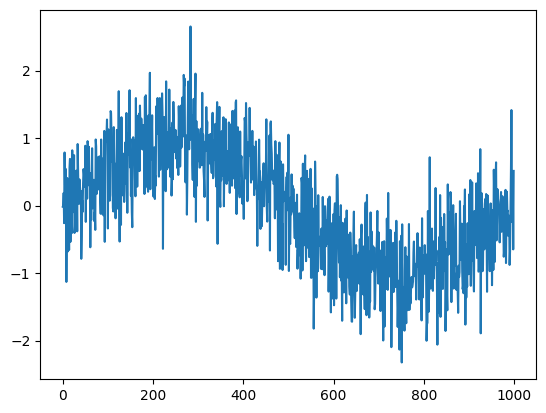

In [57]:
plt.plot(noisy_data);

That is, replace every 10 consecutive array elements with their average value, reducing the number of array elements from 1000 to 100, but representing the same curve (ranging from ‒1 to 1).

<br>

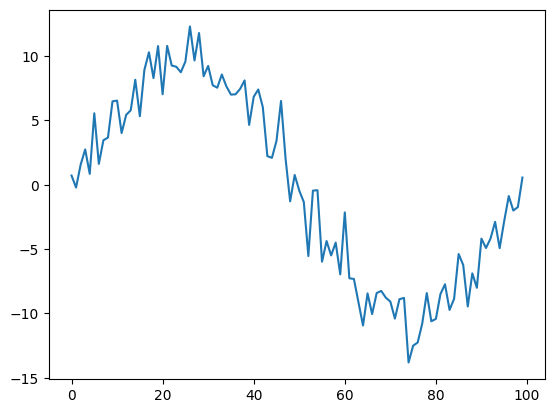

In [58]:
plt.plot(np.sum(noisy_data.reshape(-1, 10), axis=1));